In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df= pd.read_csv(r"C:\Users\Aishwarya\Downloads\cardata.csv")

In [3]:
df.shape

(301, 9)

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [8]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1, 'CNG':2}}, inplace=True)

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_19620\707844352.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1, 'CNG':2}}, inplace=True)


In [9]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [10]:
df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_19620\1778443249.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)


In [11]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [12]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_19620\1748549881.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)


In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
df['Owner'].unique()

array([0, 1, 3])

In [15]:
y= df['Selling_Price']
x= df.drop(['Car_Name', 'Selling_Price'], axis=1)

In [16]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [17]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [41]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=2)

In [42]:
lr= LinearRegression()

In [43]:
lr.fit(x_train, y_train)

LinearRegression()

In [44]:
train_data_pred= lr.predict(x_train)

In [45]:
score1= metrics.r2_score(y_train, train_data_pred)
print(score1)

0.8863492418513184


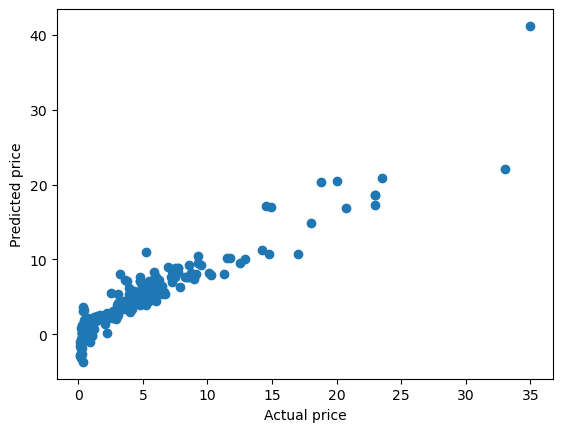

In [46]:
plt.scatter(y_train, train_data_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

In [47]:
test_data_pred=lr.predict(x_test)

In [48]:
score2= metrics.r2_score(y_test, test_data_pred)
print(score2)

0.8191909743727105


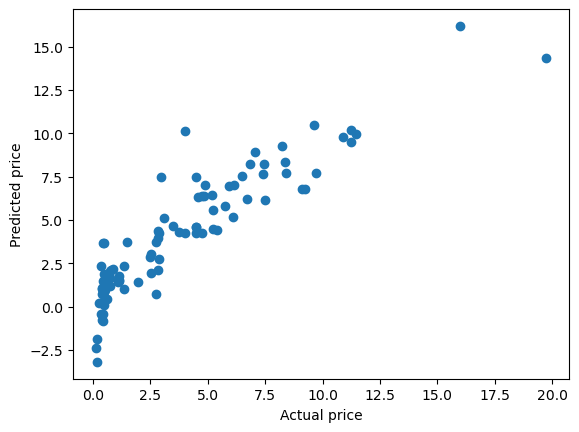

In [49]:
plt.scatter(y_test, test_data_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

In [50]:
print(lr.predict([[2021,6.0,12000,1,1,0,3]]))

[5.1576226]


C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [51]:
print(lr.predict([[2013,9.54,43000,1,0,0,0]]))

[7.07333553]


C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
